In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Mode choice example

This notebook gives an example on how to work with discrete choice data and how to estimate a simple choice model.

First, we load the data set

In [101]:
df = pd.read_csv("mode_choice_data.csv", sep = ";")

It contains information on 1,000 trips that have been performed by a sample population:

In [102]:
df.describe()

,weight,car_in_vehicle_time_min,pt_in_vehicle_time_total_min,pt_total_walk_travel_time_min,pt_transfers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,320.869124,21.031406,25.228000,21.242067,0.857000
std,214.914135,15.607052,22.373256,9.541779,0.945222
min,39.163101,0.828332,0.000000,1.950000,0.000000
25%,181.537807,9.633756,8.000000,14.629167,0.000000
50%,264.180866,16.161660,19.000000,20.175000,1.000000
75%,396.087819,28.825804,37.000000,26.541667,1.000000
max,1635.350801,119.052006,150.000000,73.450000,4.000000


Our goal is to estimate a multinomial logit model using scikit-learn. We split the data set into labels, weights, and inputs:

In [104]:
X = df[[
    "car_in_vehicle_time_min", "pt_in_vehicle_time_total_min", "pt_total_walk_travel_time_min",
    "pt_transfers"
]].values

Y = df["is_car"].values
W = df["weight"].values

In [105]:
Y = Y.astype(int)

We can now estimate the regression model:

In [106]:
model = LogisticRegression()
model.fit(X, Y, W)

LogisticRegression()

In [107]:
Ypred = model.predict(X)

Metrics on the prediction:

In [108]:
np.mean(Y), np.mean(Ypred), np.mean(Y == Ypred)

(0.762, 0.805, 0.821)

We notice that the coefficients are not as we would like them to be (non-positive):

In [109]:
model.coef_, model.intercept_

(array([[-0.23071835,  0.07933375,  0.1902051 ,  2.53750136]]),
 array([-0.73565177]))

However, we can already experiment with this model:

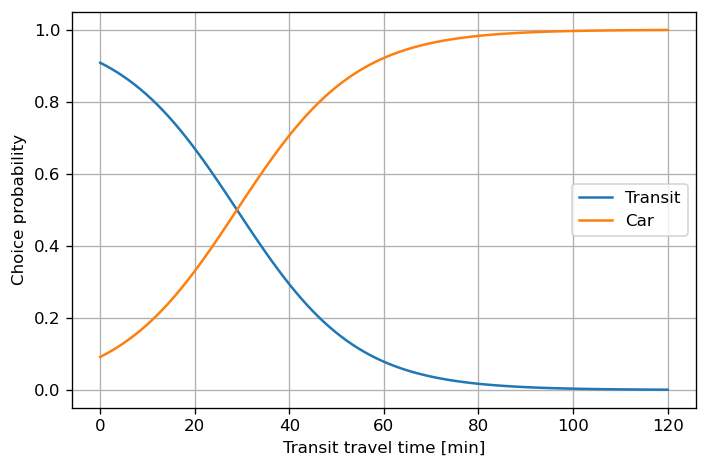

In [111]:
car_travel_time = 15
pt_travel_time = np.linspace(0, 1, 100) * 120
pt_access_time = 10
transfers = 0

X = np.zeros((len(pt_travel_time), 4))
X[:,0] = car_travel_time
X[:,1] = pt_travel_time
X[:,2] = pt_access_time
X[:,3] = transfers

probabilities = model.predict_proba(X)

plt.figure(dpi = 120, figsize = (6, 4))

plt.plot(pt_travel_time, probabilities, label = ["Transit", "Car"])
plt.legend()
plt.grid()
plt.xlabel("Transit travel time [min]")
plt.ylabel("Choice probability")

plt.tight_layout()